调幅（AM）、调频（FM）、调相（PM）是三种常见的调制方式，分别通过改变载波的幅度、频率和相位来承载信息。以下是每种调制方式的原理与简单的代码演示：

# 1. 调幅（AM - Amplitude Modulation）

**原理**：调幅是通过改变载波的**幅度**来表示基带信号的信息。在调幅中，载波的频率保持不变，幅度根据基带信号的瞬时值进行变化。AM调制常用于广播电台。

公式：
$$s(t) = (1 + m(t)) \cdot \cos(2 \pi f_c t)$$

其中：
- $s(t)$ 是调制后的信号，
- $m(t)$ 是基带信号，
- $f_c$ 是载波频率。

## 1.1. 调幅代码演示

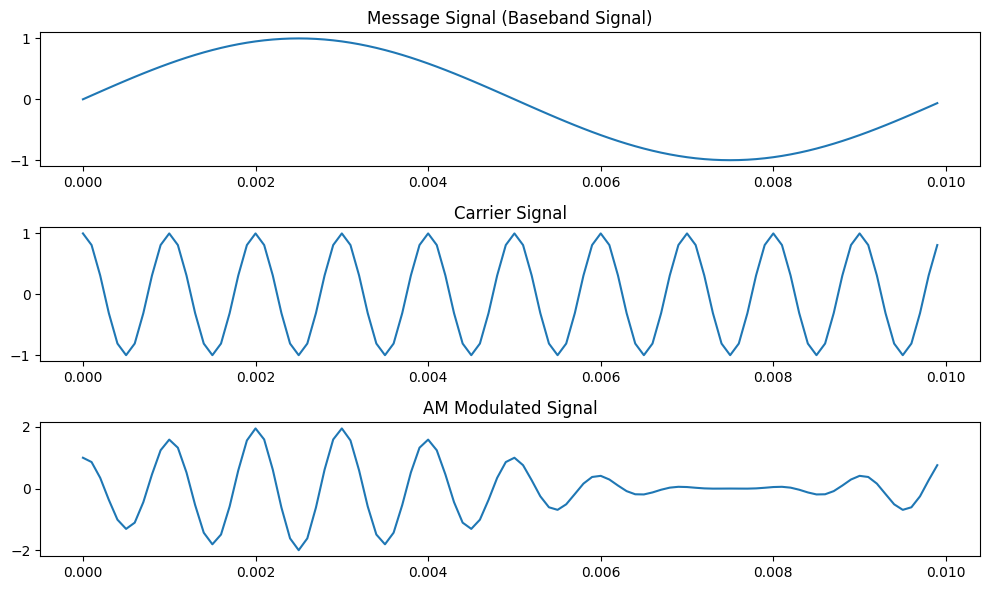

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 定义参数
fc = 1000  # 载波频率 (Hz)
fs = 10000  # 采样频率 (Hz)
t = np.arange(0, 0.01, 1/fs)  # 时间轴

# 基带信号 (低频信号)
message_signal = np.sin(2 * np.pi * 100 * t)  # 100 Hz的基带信号

# 载波信号
carrier_signal = np.cos(2 * np.pi * fc * t)

# 调幅
modulated_signal = (1 + message_signal) * carrier_signal

# 绘图
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, message_signal)
plt.title("Message Signal (Baseband Signal)")

plt.subplot(3, 1, 2)
plt.plot(t, carrier_signal)
plt.title("Carrier Signal")

plt.subplot(3, 1, 3)
plt.plot(t, modulated_signal)
plt.title("AM Modulated Signal")

plt.tight_layout()
plt.show()


## 1.2. 调幅解调 （AM Demodulation）

解调是从调制信号中提取出原始的基带信号（数据信息）的过程，不同的调制方式（AM、FM、PM）对应着不同的解调方法。下面是三种主要调制方式的解调原理和代码演示：

**原理**：调幅解调的目的是提取出调制信号的幅度变化。常用的方法是使用**包络检波**，即通过整流和低通滤波去除载波信号，仅保留基带信息。

**步骤**：
1. 对调制信号进行绝对值处理或整流（提取包络）。
2. 使用低通滤波器去除高频成分，只保留基带信号。

**低通滤波器的选择** 和 **包络检测的精度** 通常会影响解调的精度，因为

1. **低通滤波器的设计**：在这个代码中，低通滤波使用了简单的均值滤波（卷积核是 `np.ones(100)/100`）。这种滤波器对高频成分的抑制能力较弱，导致一些高频残留，影响了信号的平滑性和准确度。如果你想得到更接近原始的基带信号，可以尝试设计一个更精确的低通滤波器，比如 **Butterworth滤波器** 或 **FIR滤波器**，并确保其截止频率足够低，接近基带信号的频率。

2. **包络检测中的不理想情况**：包络检测通过绝对值处理，但由于载波频率较高，导致包络信号并不完美。为了改善包络提取效果，可以尝试使用 **Hilbert变换** 来更准确地得到包络，而不仅是简单的绝对值处理。

3. **载波干扰**：恢复的信号中可能仍然包含载波频率的残余分量，这会在解调后使信号有所偏离。使用一个更合适的滤波器会有助于去除这些残余载波。

## 1.3. 如何改进

可以尝试以下方法来改善解调效果：

- **使用更精确的低通滤波器**：例如，设计一个带有更明确频率响应的滤波器（如Butterworth）。
- **改进包络检测**：通过Hilbert变换计算更平滑的包络信号。

## 1.4. 解调代码演示

**代码演示**：

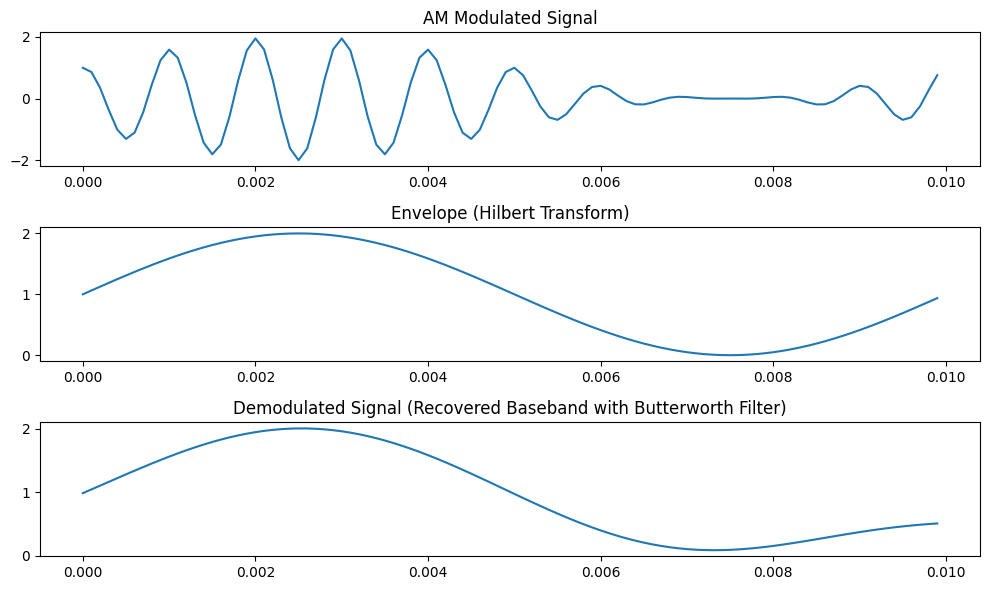

In [2]:
from scipy.signal import butter, filtfilt, hilbert

# Hilbert变换提取包络
analytic_signal = hilbert(modulated_signal)
envelope = np.abs(analytic_signal)

# 使用Butterworth低通滤波器
b, a = butter(4, 200 / (fs / 2), btype='low')  # 200 Hz是基带信号的频率上限
filtered_signal = filtfilt(b, a, envelope)

# 绘图
plt.figure(figsize=(10, 6))
plt.subplot(3, 1, 1)
plt.plot(t, modulated_signal)
plt.title("AM Modulated Signal")

plt.subplot(3, 1, 2)
plt.plot(t, envelope)
plt.title("Envelope (Hilbert Transform)")

plt.subplot(3, 1, 3)
plt.plot(t, filtered_signal)
plt.title("Demodulated Signal (Recovered Baseband with Butterworth Filter)")

plt.tight_layout()
plt.show()

### 总结
- **AM**：通过改变幅度来调制。
- **FM**：通过改变频率来调制。
- **PM**：通过改变相位来调制。

不同的调制方式在不同的应用中各有优势，根据传输距离、带宽需求和抗干扰能力来选择合适的方式。


- **AM解调**：通过包络检波（整流 + 低通滤波）来恢复基带信号。
- **FM解调**：通过差分相位检测来提取频率变化，再通过低通滤波提取基带信号。
- **PM解调**：同样利用相位差分来还原基带信号，适用于相位调制的信号。

这些解调方法各有优势，根据信号类型和需求选择合适的解调方案。